In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# Convert diagnosis to binary
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})


## **Correlation strength** :

---

### 1. **Point-Biserial Correlation (Preferred for Continuous X and Binary Y)**

* It is a special case of the Pearson correlation when one variable is continuous and the other is dichotomous.
* Formula:

$$
r_{pb} = \frac{\bar{X}_1 - \bar{X}_0}{s_X} \sqrt{\frac{n_1 n_0}{n^2}}
$$

Where:

* $\bar{X}_1$, $\bar{X}_0$ = mean of X for class 1 and class 0

* $s_X$ = standard deviation of X

* $n_1, n_0$ = counts of class 1 and class 0

* $n = n_1 + n_0$

* Interpretation: Like Pearson’s $r$, ranges from $-1$ to $+1$.
  Higher magnitude → stronger relationship.

---

#### Sample analysis for estimating the usefulness of X-feature, "radius_mean"

In [9]:
from scipy.stats import pointbiserialr

# Example with radius_mean
corr, pval = pointbiserialr(df['radius_mean'], df['diagnosis'])
print("Correlation:", corr, "p-value:", pval)


Correlation: 0.7300285113754563 p-value: 8.465940572263701e-96


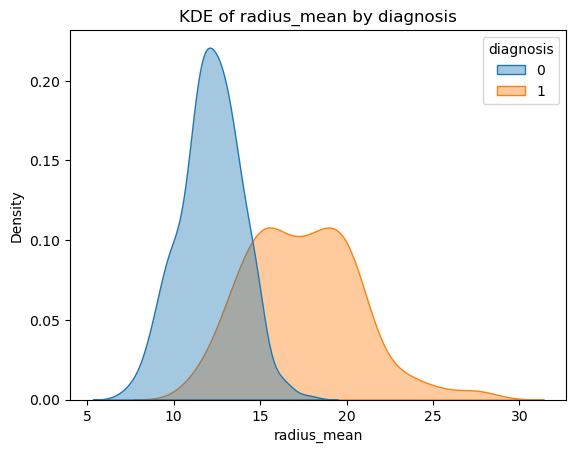

<Figure size 640x480 with 0 Axes>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x="radius_mean", hue="diagnosis", fill=True, common_norm=False, alpha=0.4)
plt.title("KDE of radius_mean by diagnosis")
plt.show()

# Save the plot to a file
plt.savefig('plot.png')  # Saves as a PNG file




* **Point-Biserial Correlation** between `radius_mean` and `diagnosis`:

  $$
  r \approx 0.73, \; p \ll 0.001
  $$

  This indicates a **strong positive correlation**: larger tumor radius is strongly associated with being **Malignant**.

* **KDE plot**:
  The distributions for **Benign** and **Malignant** cases are clearly separated. Malignant tumors tend to have **higher radius\_mean** values, while Benign ones cluster at lower values.

**Comment on usefulness:**
Since the correlation is high (0.73) and the KDE curves show strong separation with minimal overlap, `radius_mean` is a **highly predictive feature** for distinguishing between Benign and Malignant tumors in this dataset.


In [11]:
# Tabulate the correlation strengths with y for each x-column

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#numeric_cols = numeric_cols.drop('diagnosis')  # exclude target

# Compute correlations
results = []
for col in numeric_cols:
    corr, pval = pointbiserialr(df[col], df['diagnosis'])
    results.append((col, corr, pval))

# Create DataFrame
corr_df = pd.DataFrame(results, columns=['Feature', 'PointBiserialCorr', 'p-value'])

# Sort by absolute correlation strength
corr_df['AbsCorr'] = corr_df['PointBiserialCorr'].abs()
corr_df = corr_df.sort_values(by='AbsCorr', ascending=False).reset_index(drop=True)

print(corr_df)  


                    Feature  PointBiserialCorr        p-value   AbsCorr
0                 diagnosis           1.000000   0.000000e+00  1.000000
1      concave points_worst           0.793566  1.969100e-124  0.793566
2           perimeter_worst           0.782914  5.771397e-119  0.782914
3       concave points_mean           0.776614  7.101150e-116  0.776614
4              radius_worst           0.776454  8.482292e-116  0.776454
5            perimeter_mean           0.742636  8.436251e-101  0.742636
6                area_worst           0.733825   2.828848e-97  0.733825
7               radius_mean           0.730029   8.465941e-96  0.730029
8                 area_mean           0.708984   4.734564e-88  0.708984
9            concavity_mean           0.696360   9.966556e-84  0.696360
10          concavity_worst           0.659610   2.464664e-72  0.659610
11         compactness_mean           0.596534   3.938263e-56  0.596534
12        compactness_worst           0.590998   7.069816e-55  0

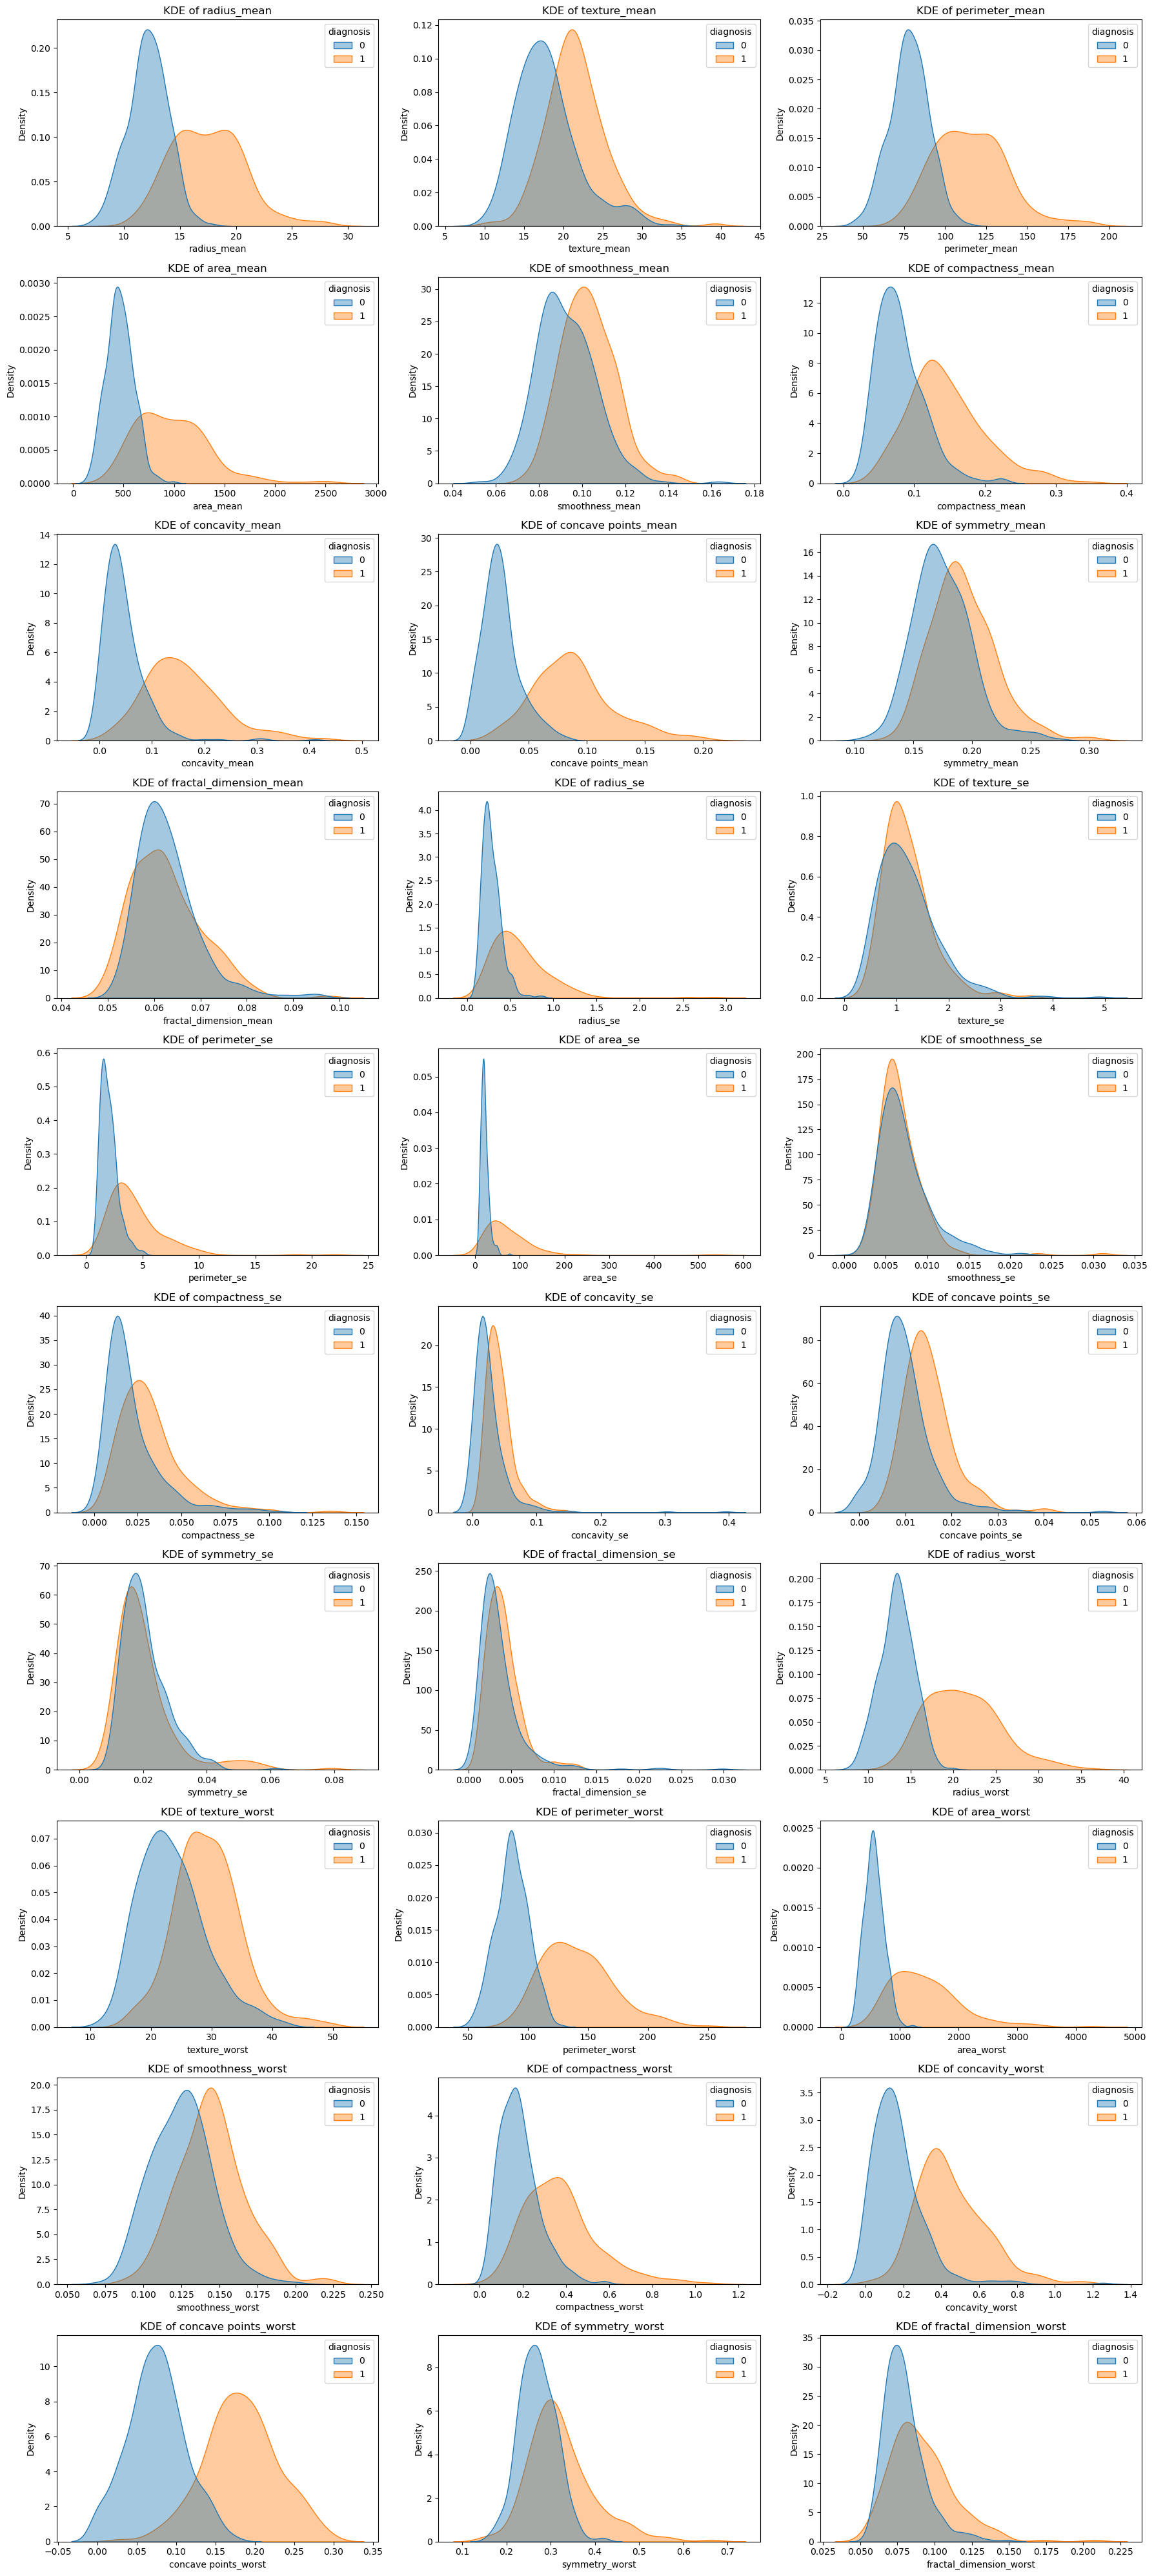

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure target column is binary categorical
target_col = "diagnosis"  
df[target_col] = df[target_col].astype("category")

# Get only numeric feature columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop(target_col, errors="ignore")

# Set up the grid
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # ceiling division

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=df, x=col, hue=target_col, common_norm=False, fill=True, alpha=0.4)
    plt.title(f"KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


#### Observations:
The point-biserial coefficients for  fractal_dimension_se, smoothness_se,fractal_dimension_mean, texture_se,and symmetry_se are very low which are also supported by the non-separated kde distribution plots. Therefore it is proposed to build one model with all x-features and another model that excludes the lower correlation coeficients.

### Logistic Regression Model 1 considering all x-columns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Idenfy class balance

df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [19]:
# Features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
y_train.value_counts()

diagnosis
0    285
1    170
Name: count, dtype: int64

In [23]:
# Logistic Regression model
model1 = LogisticRegression(max_iter=3000)
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)
y_pred

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [20]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[71  1]
 [ 6 36]]


# Build Model by deleting features with low correlation strength with target variable

In [25]:
# drop features
df1 = df.drop(["fractal_dimension_se", "smoothness_se", "fractal_dimension_mean", "texture_se", "symmetry_se"], axis =1)
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
# Features and target
X = df1.drop(columns=["diagnosis"])
y = df1["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
# Logistic Regression model
model2 = LogisticRegression(max_iter=3000)
model2.fit(X_train, y_train)

# Predictions
y_pred = model2.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [37]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [26]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[71  1]
 [ 6 36]]
